## VU Visual Data Science WS18 - TU Wien 
- Exercise 1

### Dzenan Hamzic BSc

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
from sklearn.cluster import KMeans
from sklearn import preprocessing

import plotly
import requests
from requests.auth import HTTPBasicAuth
print(plotly.__version__)
uname = 'dzhamzic'
papik = 'YY2p1AUytdNlufUidamg'
plotly.tools.set_credentials_file(username=uname, api_key=papik)
plotly.tools.set_config_file(world_readable=True, sharing='public')

auth = HTTPBasicAuth(uname, papik)
headers = {'Plotly-Client-Platform': 'python'}


plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

3.2.1


In [287]:
df = pd.read_excel('/home/xxx/MScBI/S4/VisualDS/Nutritions.xlsx')
df.head(5)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [288]:
len(df)

8790

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 53 columns):
NDB_No               8790 non-null int64
Shrt_Desc            8790 non-null object
Water_(g)            8789 non-null float64
Energ_Kcal           8790 non-null int64
Protein_(g)          8790 non-null float64
Lipid_Tot_(g)        8790 non-null float64
Ash_(g)              8465 non-null float64
Carbohydrt_(g)       8790 non-null float64
Fiber_TD_(g)         8196 non-null float64
Sugar_Tot_(g)        6958 non-null float64
Calcium_(mg)         8442 non-null float64
Iron_(mg)            8646 non-null float64
Magnesium_(mg)       8051 non-null float64
Phosphorus_(mg)      8211 non-null float64
Potassium_(mg)       8364 non-null float64
Sodium_(mg)          8707 non-null float64
Zinc_(mg)            8084 non-null float64
Copper_mg)           7533 non-null float64
Manganese_(mg)       6630 non-null float64
Selenium_(µg)        7090 non-null float64
Vit_C_(mg)           7972 non-null flo

## Task 1: Clustering 

### (Visual analysis)

#### Plotting with Seaborn

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[]

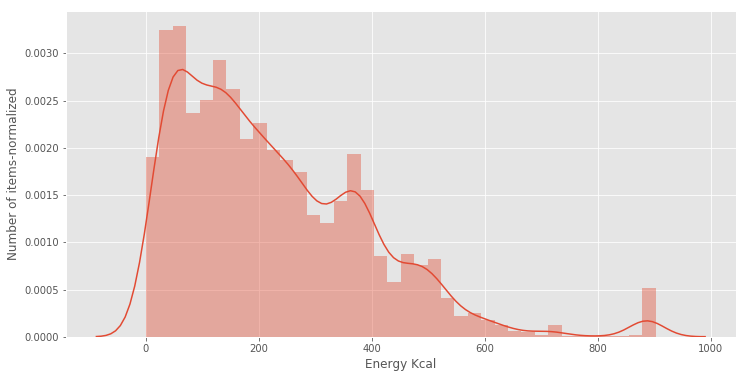

In [290]:
ax = sns.distplot(df.Energ_Kcal.dropna())
ax.set(xlabel='Energy Kcal', ylabel='Number of items-normalized')
plt.plot()

For the purpose of this subtask, I have also used seaborn library to visualize data clusters.
The benefit of the seaborn's bar method is that it does not need apriori knowledge of bin number. 

### Plotting with PyPlot

(array([234., 513., 556., 487., 400., 343., 459., 455., 414., 343., 360.,
        338., 308., 285., 296., 270., 197., 188., 221., 236., 316., 263.,
        171., 111.,  96., 144., 132., 128., 112.,  75.,  34.,  31.,  43.,
         26.,  25.,  14.,   7.,   8.,   3.,  25.,   3.,   1.,   1.,   2.,
          0.,   1.,   0.,   4.,   6., 105.]),
 array([  0.  ,  18.04,  36.08,  54.12,  72.16,  90.2 , 108.24, 126.28,
        144.32, 162.36, 180.4 , 198.44, 216.48, 234.52, 252.56, 270.6 ,
        288.64, 306.68, 324.72, 342.76, 360.8 , 378.84, 396.88, 414.92,
        432.96, 451.  , 469.04, 487.08, 505.12, 523.16, 541.2 , 559.24,
        577.28, 595.32, 613.36, 631.4 , 649.44, 667.48, 685.52, 703.56,
        721.6 , 739.64, 757.68, 775.72, 793.76, 811.8 , 829.84, 847.88,
        865.92, 883.96, 902.  ]),
 <a list of 50 Patch objects>)

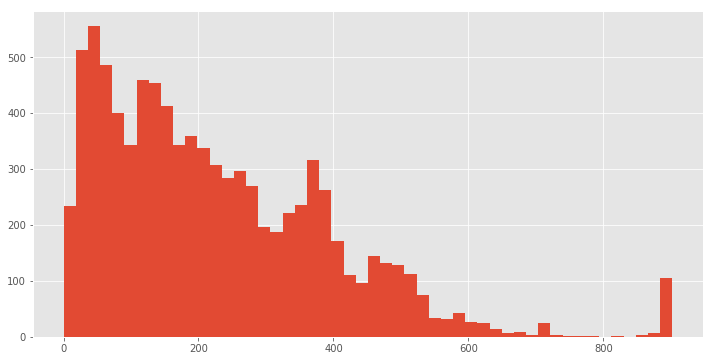

In [294]:
plt.hist(df.Energ_Kcal.dropna(), bins=50)
#ax.set(xlabel='Energy Kcal', ylabel='Number of items')

The number of bins(granularity) for histogram distribution plotting is crucial here. To small number of bins does not show real/appropriate underlying item distribution.

By looking at the histogram, there are few clear groupings/clusters to be seen. By counting the peaks and the bins around them, I would say, there are 5 clusters in the data.

### (Statistical analysis)

In [73]:
y = df.Energ_Kcal.values
x = df.NDB_No.values

Plotting using index nr. axis

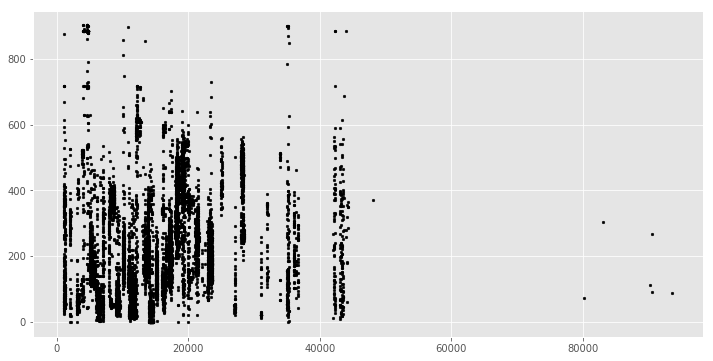

In [74]:
plt.scatter(x, y, c='black', s=7)

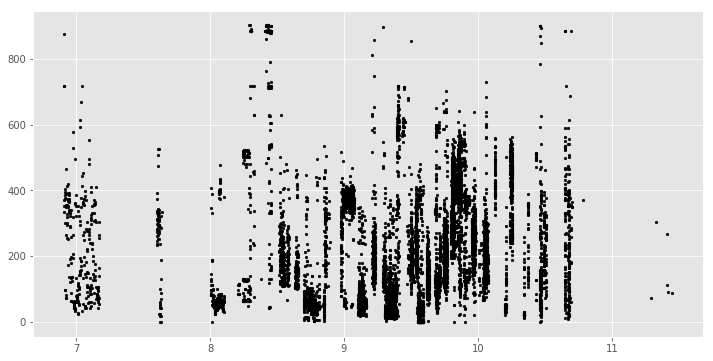

In [75]:
plt.scatter(np.log(x), y, c='black', s=7)

Plotting only 1 axis

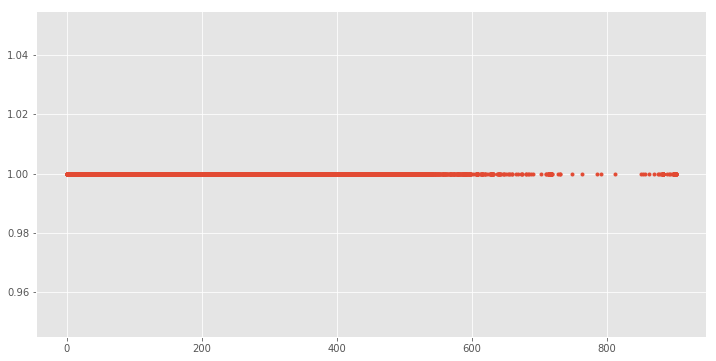

In [76]:
plt.plot(y, len(y) * [1], ".")

### KMeans

In [77]:
## try out clustering
km = KMeans(n_clusters=2)
km.fit(y.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
labels = km.labels_
km.cluster_centers_

array([[427.41860465],
       [130.42977151]])

In [79]:
d = {"kcal":y, "cluster":labels}
df_labeled = pd.DataFrame(d)
df_labeled.tail(10)

,cluster,kcal
8780,0,365
8781,0,351
8782,0,350
8783,0,370
8784,1,73
8785,0,305
8786,1,111
8787,1,269
8788,1,90
8789,1,89


In [80]:
aggregated = df_labeled.groupby(['cluster']).groups
for group in aggregated:
    print(group)
    print("cluster:", group, "numberOfitems:", len(aggregated[group]))

0
cluster: 0 numberOfitems: 2850
1
cluster: 1 numberOfitems: 5940


For the purpose of statistical analysis I chose K-means clustering algorithm. 
This clustering algorithm is simple and very effective. The main drawback of the K-means 
is the prior knowledge of the number of clusters in the data. 
For this purpose, I decided to run K-means multiple times with
stepwise increasing number of clusters, so called elbow method, in order to find optimal number of clusters in the data. The idea is to find minimal number of clusters that describe the most variance in the data.

## Find number of clusters

In [81]:

cluster_number = [i for i in range(1,10)]
cluster_number

# log cluster statistics
cluster_stats = {}
for cn in cluster_number:
    print("nr. clusters:", cn)
    # do clustering
    km = KMeans(n_clusters=cn)
    km.fit(y.reshape(-1,1))
    
    # assign labels to points
    labels = km.labels_
    d = {"kcal":y, "cluster":labels}
    df_labeled = pd.DataFrame(d)
    
    # calculate variance between clusters
    aggregated = df_labeled.groupby(['cluster']).groups
    total_variance = 0
    for group in aggregated:
        total_variance += np.var(aggregated[group])
    
    total_variance = total_variance/cn
    print(total_variance)
    # log
    cluster_stats[cn] = total_variance
        

nr. clusters: 1
6438674.916666667
nr. clusters: 2
6529185.280687767
nr. clusters: 3
6563151.9350980325
nr. clusters: 4
6025207.7178029725
nr. clusters: 5
5735935.33276693
nr. clusters: 6
5653240.313825734
nr. clusters: 7
5689044.770900496
nr. clusters: 8
5446565.481320464
nr. clusters: 9
5430565.163689324


In [82]:
list(cluster_stats.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### K-means elbow method to determine the optimal number of clusters

[Text(0, 0.5, 'intercluster variance'), Text(0.5, 0, 'cluster number')]

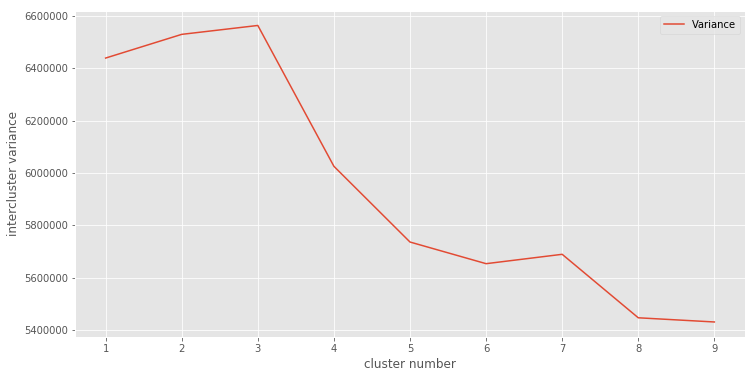

In [83]:
ax = sns.lineplot(y=list(cluster_stats.values()), x=list(cluster_stats.keys()), label="Variance")
ax.set(xlabel='cluster number', ylabel='intercluster variance')

In this case, the elbow is obvious. The most gain in variance is the 
transition from 3 to 4 clusters. Therefore, for the purpose of this subtask/exercise, I will chose 
to do Kmeans clustering with 4 clusters.

In [84]:
km = KMeans(n_clusters=4)
km.fit(y.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
km.cluster_centers_

array([[226.28362469],
       [415.00236072],
       [748.84469697],
       [ 77.22302358]])

In [86]:
labels = km.labels_
d = {"kcal":y, "cluster":labels, "new_axis":[0]*y}
df_labeled = pd.DataFrame(d)
df_labeled.head(5)

,cluster,kcal,new_axis
0,2,717,0
1,2,718,0
2,2,876,0
3,1,353,0
4,1,371,0


In [87]:
# find number of points in each cluster and assign cluster center 
cluster_info = {}
aggregated = df_labeled.groupby(['cluster']).groups
for group in aggregated:
    cluster_info[group] = {"nr.items":len(aggregated[group]), "center":np.round(km.cluster_centers_[group][0],2), "variance":np.round(np.sqrt(np.var(aggregated[group])),2)}
    print(len(aggregated[group]))
    
cluster_info

2803
2118
264
3605


{0: {'center': 226.28, 'nr.items': 2803, 'variance': 2408.57},
 1: {'center': 415.0, 'nr.items': 2118, 'variance': 2607.17},
 2: {'center': 748.84, 'nr.items': 264, 'variance': 2455.16},
 3: {'center': 77.22, 'nr.items': 3605, 'variance': 2331.35}}

### K-means clustering - summary 

In [88]:
cluster_info_df = pd.DataFrame(cluster_info)
cluster_info_df

,0,1,2,3
center,226.28,415.00,748.84,77.22
nr.items,2803.00,2118.00,264.00,3605.00
variance,2408.57,2607.17,2455.16,2331.35


The four clusters have clearly different center values(means), roughly equal variances, 
and significantly unequal number if items that belong to that clusters.
Based on this analysis, most of the meals 3605 belong to the low calory cluster (number 0).
Only 264 meals are in the "high calorie" cluster nr. 3. 

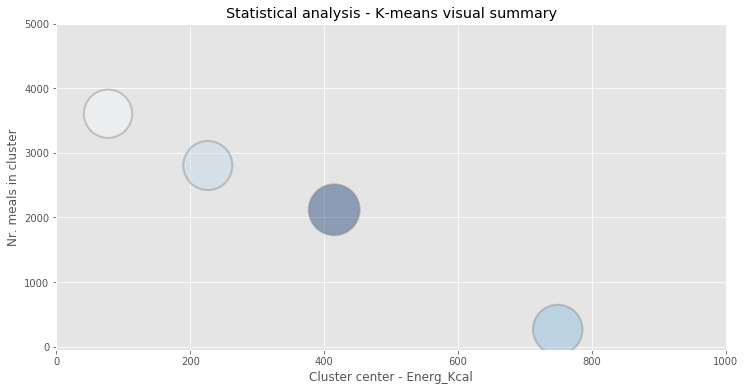

In [89]:
x = cluster_info_df.iloc[[0]]
y = cluster_info_df.iloc[[1]]
z = cluster_info_df.iloc[[2]]
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlim(0, 1000)
plt.ylim(-50, 5000)

plt.xlabel("Cluster center - Energ_Kcal")
plt.ylabel("Nr. meals in cluster")
plt.title("Statistical analysis - K-means visual summary")
 
plt.show()


This visual summary of clustering into 4 clusters points out the negative relationship between number meals and the number of high calorical meals in the data set. The buble size indicates variance between items in a cluster.

In [90]:
## assign new (normal) coordinate to kcal values for nicer cluster visualization
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for key in cluster_info.keys():
    cluster_number_points = cluster_info[key]["nr.items"]
    cluster_center = cluster_info[key]["center"]
    cluster_variance = cluster_info[key]["variance"]
    
    # spread around centroid
    sigma = cluster_variance
    # update new axis with normaly distributed random values
    df_labeled.loc[df_labeled.cluster == key , 'new_axis'] = np.random.normal(cluster_center, sigma, cluster_number_points)
    df_labeled.loc[df_labeled.cluster == key , 'c'] = colors[key]
    #df_labeled.loc[df_labeled['cluster'] == key]["new_axis"] = 

In [91]:
df_labeled.head(10)

,cluster,kcal,new_axis,c
0,2,717,1028.988206,b
1,2,718,2053.885769,b
2,2,876,5000.538627,b
3,1,353,-488.158726,g
4,1,371,1536.033431,g
5,1,334,-488.306917,g
6,0,300,2031.003695,r
7,1,376,-2553.299896,g
8,1,404,-2412.424374,g
9,1,387,2270.350336,g


Text(0.5, 1.0, 'Statistical analysis - K-means visual summary')

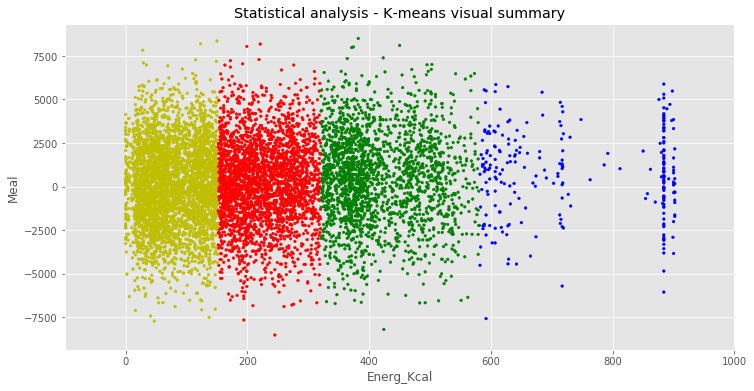

In [92]:
xx = df_labeled.kcal
yy = df_labeled.new_axis
cl= df_labeled.c
plt.scatter(xx, yy, c=cl, s=7)
plt.xlim(-100, 1000)
plt.xlabel("Energ_Kcal")
plt.ylabel("Meal")
plt.title("Statistical analysis - K-means visual summary")

For the sake of plotting all meals in one scatter plot,
I have added new y dimension for every meal which value is 
random normally distributed around meals corresponding cluster center.

This visual summary indicates that the points in the most right corner should be clustered separately.  
Statistical analysis indicates that 4 clusters are best option, but, visual analysis indicates that there should be 
one additional cluster with mean around 900. I think this point of visual analysis shows it's real power comparing to pure statistical approach.

The choice of the cluster number from statistical analysis with K-means may be right, but the centers would have to be rearanged based on visual analysis.


## Task 2: Correlations

In [93]:
corr = df.corr()

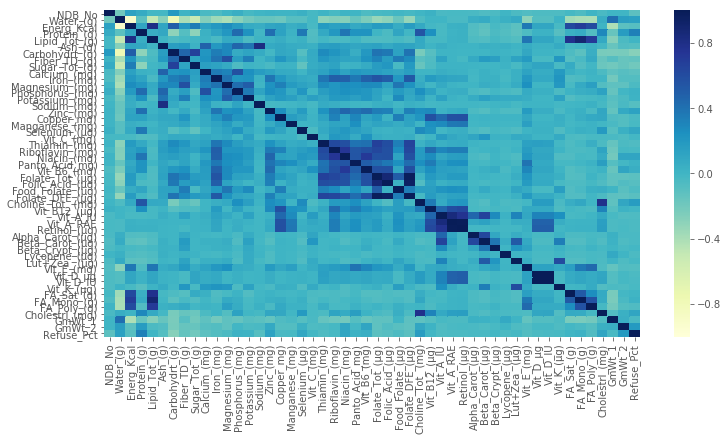

In [94]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1, cmap="YlGnBu")

Water_(g) low> Energ_Kcal

In [96]:
df.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [97]:
# get only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.dropna().select_dtypes(include=numerics)

In [98]:
# scale variables
scaler = preprocessing.MinMaxScaler()
matrix_scaled = scaler.fit_transform(df_numeric)
matrix_scaled

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



array([[0.00000000e+00, 1.58858859e-01, 7.94900222e-01, ...,
        3.92960875e-03, 2.73917825e-03, 0.00000000e+00],
       [2.31165769e-05, 1.67367367e-01, 7.96008869e-01, ...,
        2.90449342e-03, 1.77946616e-03, 0.00000000e+00],
       [4.62331538e-05, 2.40240240e-03, 9.71175166e-01, ...,
        1.05928584e-02, 4.08877337e-02, 0.00000000e+00],
       ...,
       [9.98682355e-01, 2.82682683e-01, 3.18181818e-01, ...,
        3.04117547e-02, 1.40957713e-02, 0.00000000e+00],
       [9.99953767e-01, 6.80680681e-02, 4.04656319e-01, ...,
        8.11549633e-03, 7.89763071e-03, 0.00000000e+00],
       [1.00000000e+00, 6.84684685e-02, 3.88026608e-01, ...,
        6.49239706e-03, 6.29811057e-03, 0.00000000e+00]])

In [99]:
df_scaled = pd.DataFrame(matrix_scaled, columns=df_numeric.columns.values)
df_scaled.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
0,0.000000,0.158859,0.794900,0.009930,0.8111,0.021142,0.000600,0.0,0.000601,0.003259,...,0.000000,0.000000,0.004083,0.593829,0.251180,0.052702,0.069355,0.003930,0.002739,0.0
1,0.000023,0.167367,0.796009,0.005724,0.7830,0.016232,0.028706,0.0,0.000601,0.003123,...,0.000000,0.000000,0.002683,0.524722,0.237474,0.057690,0.072581,0.002904,0.001779,0.0
2,0.000046,0.002402,0.971175,0.003271,0.9948,0.000000,0.000000,0.0,0.000000,0.000543,...,0.000000,0.000000,0.005016,0.715860,0.343319,0.063976,0.082581,0.010593,0.040888,0.0
3,0.000069,0.424525,0.391353,0.250000,0.2874,0.051202,0.023405,0.0,0.005010,0.071700,...,0.015674,0.016458,0.001400,0.215819,0.092939,0.013855,0.024194,0.023877,0.003299,0.0
4,0.000092,0.411512,0.411308,0.271495,0.2968,0.031864,0.027906,0.0,0.005110,0.091526,...,0.015674,0.017241,0.001458,0.216917,0.102738,0.013578,0.030323,0.112421,0.022493,0.0


In [100]:
# get number of variables
len(df_scaled.columns)

50

In [43]:
# build plotly paralel coordinate plot data
my_list = list()
for column in df_scaled.columns:
    column_max = max(df_scaled[column])
    column_min = min(df_scaled[column])
    lbl = column
    vals = df_scaled[column].values
    my_list.append(dict(range=[column_min,column_max], values=vals, label=lbl))

In [101]:
# plot all fifty coordinates
data = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = my_list
    )
]

py.iplot(data, filename = 'parcoord-dimensions')

Plotting all 50 variables on one plot makes it impossible to intepret. 

In [102]:
len(my_list)

50

In [103]:
# plot in 10 steps
for start in range(0, len(my_list),10):
    #print(my_list[start:start+10])
    sublist = my_list[start:start+10]
    data = [
        go.Parcoords(
            line = dict(color = 'blue'),
            dimensions = sublist
        )
    ]
    py.iplot(data, filename = 'parcoord-dimensions'+str(start))

In [295]:
corr["Water_(g)"].sort_values(ascending=True)#.plot(x=corr["Water_(g)"].index.values)

Energ_Kcal          -0.900554
Carbohydrt_(g)      -0.773920
Sugar_Tot_(g)       -0.506365
Lipid_Tot_(g)       -0.489781
FA_Poly_(g)         -0.405290
Magnesium_(mg)      -0.402719
Fiber_TD_(g)        -0.394281
FA_Mono_(g)         -0.393146
FA_Sat_(g)          -0.366525
Iron_(mg)           -0.353255
Folate_Tot_(µg)     -0.333919
Folate_DFE_(µg)     -0.324301
Folic_Acid_(µg)     -0.294714
Vit_E_(mg)          -0.293599
Thiamin_(mg)        -0.290373
Phosphorus_(mg)     -0.288052
Ash_(g)             -0.281244
Niacin_(mg)         -0.268055
Calcium_(mg)        -0.263806
Riboflavin_(mg)     -0.261777
Vit_B6_(mg)         -0.239902
Potassium_(mg)      -0.198637
NDB_No              -0.187699
Copper_mg)          -0.177720
Food_Folate_(µg)    -0.156521
Sodium_(mg)         -0.156234
Zinc_(mg)           -0.152804
Panto_Acid_mg)      -0.149140
Protein_(g)         -0.103979
Selenium_(µg)       -0.092437
Manganese_(mg)      -0.091474
Vit_D_IU            -0.075037
Vit_D_µg            -0.074887
Choline_To

In [106]:
corr["Energ_Kcal"].sort_values(ascending=False)

Energ_Kcal           1.000000
Lipid_Tot_(g)        0.806677
FA_Mono_(g)          0.691560
FA_Sat_(g)           0.624444
FA_Poly_(g)          0.607855
Carbohydrt_(g)       0.493028
Vit_E_(mg)           0.370429
Sugar_Tot_(g)        0.351313
Magnesium_(mg)       0.266927
Fiber_TD_(g)         0.204450
Iron_(mg)            0.199372
Phosphorus_(mg)      0.192235
Folate_Tot_(µg)      0.186024
Thiamin_(mg)         0.183108
Folate_DFE_(µg)      0.174583
Folic_Acid_(µg)      0.164270
Niacin_(mg)          0.162404
Riboflavin_(mg)      0.146948
Calcium_(mg)         0.143632
NDB_No               0.136262
Copper_mg)           0.129945
Vit_B6_(mg)          0.121367
Zinc_(mg)            0.115431
Ash_(g)              0.114172
Protein_(g)          0.112636
Vit_D_IU             0.104653
Vit_D_µg             0.104438
Panto_Acid_mg)       0.091722
Choline_Tot_ (mg)    0.087346
Selenium_(µg)        0.084681
Potassium_(mg)       0.076704
Food_Folate_(µg)     0.069801
Sodium_(mg)          0.055515
Manganese_

#############################
 Water_(g) -0.9 Energ_Kcal
 Water_(g) -0.77 Carbohydrt_(g)
 Water_(g) -0.51 Sugar_Tot_(g)

 Energ_Kcal 0.81 Lipid_Tot_(g)
 Energ_Kcal 0.37 Vit_E_(mg)
 Energ_Kcal 0.69 FA_Mono_(g)
#############################

In [107]:
#selected_df = df_scaled[["Niacin_(mg)", "Vit_B6_(mg)", "Magnesium_(mg)", "Cholestrl_(mg)", "Vit_B12_(µg)", "Retinol_(µg)", "Sugar_Tot_(g)", "Energ_Kcal", "Iron_(mg)"]]
#selected_df.head()

#selected_df = df[["Niacin_(mg)", "Vit_B6_(mg)", "Magnesium_(mg)", "Vit_B12_(µg)", "Sugar_Tot_(g)"]].dropna()
#selected_df.head()

selected_df = df[["Water_(g)", "Carbohydrt_(g)", "Sugar_Tot_(g)", "Energ_Kcal", "Lipid_Tot_(g)","Vit_E_(mg)", "FA_Mono_(g)"]].dropna()
#selected_df.head()

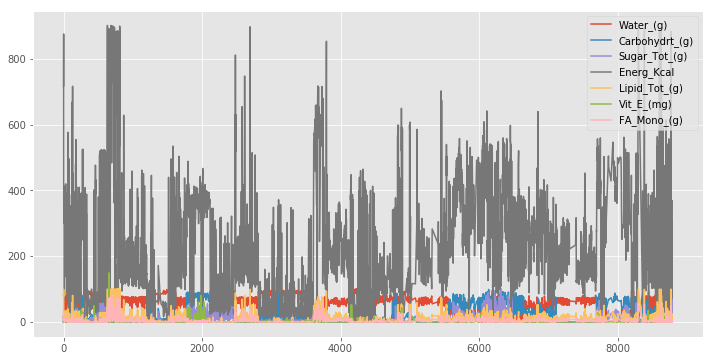

In [108]:
selected_df.plot()

In [109]:
# show min-max values for every column
for column in selected_df.columns:
    print("min:"+str(selected_df[column].min())+",max:"+str(selected_df[column].max()))

min:0.0,max:100.0
min:0.0,max:100.0
min:0.0,max:99.8
min:0,max:902
min:0.0,max:100.0
min:0.0,max:149.4
min:0.0,max:83.689


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0965561668>,
      dtype=object)

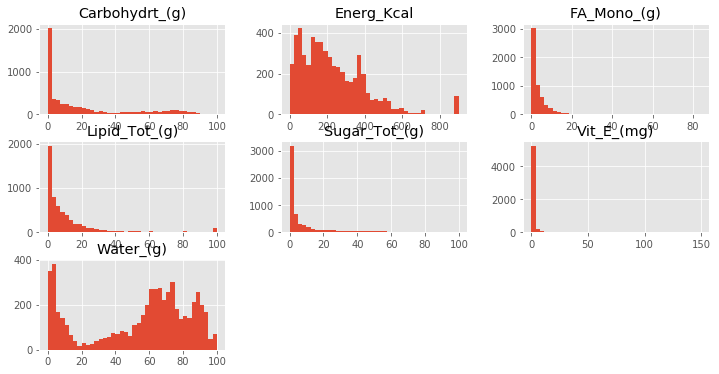

In [213]:
selected_df.hist(bins=40)

In [192]:
def plot_paralel_cords(selected_df):
    # plot selected ingridients
    my_list = list()
    for column in selected_df.columns:
        crange = None
        if column == "Water_(g)":
            crange = [10,95]
        if column == "Energ_Kcal":
            crange =[10,700]
        column_max = max(selected_df[column])
        column_min = min(selected_df[column])
        
        lbl = column
        vals = selected_df[column].values
        my_list.append(dict(range=[column_min,column_max], values=vals, label=lbl, visible=True,
                            constraintrange=crange))
    # plot all fifty coordinates
    data = [
        go.Parcoords(
            
            line = dict(color = df_labeled.cluster,
                       colorscale = 'Jet',
                       showscale = True,
                       #title='"Water_(g)" & "Energ_Kcal" Visual correlations',
                       #showlegend=True,
                       reversescale = True,
                       cmin = 0,
                       cmax = 4),
            dimensions = my_list
        )
    ]
    
    layout = go.Layout(
    title='Clustering and correlation Visualization - "Water_(g)" and "Energ_Kcal"',
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    ))

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename = 'Paarcord-Nutrition parameters-subsampling')
    
#plot_paralel_cords(selected_df)

I have invested a lot of time in this task-subpart. The initial plot looked terrible. I tried many different approaches to get this plot “right”. I decided to color the items by the cluster number they are assigned to in K-means. Colour “blue” is the fourth cluster (third in the cluster summary table above) with lowest “Energ_Kcal” center value. I have used subsampling, to reduce plot overfitting, and brushing to clearly identify correlations in the plot below.  


In [193]:
plot_paralel_cords(selected_df.sample(frac=0.075, replace=False, random_state=1))

In [ ]:
#############################
 Water_(g) -0.9 Energ_Kcal
 Water_(g) -0.77 Carbohydrt_(g)
 Water_(g) -0.51 Sugar_Tot_(g)

Energ_Kcal 0.81 Lipid_Tot_(g)
Energ_Kcal 0.69 FA_Mono_(g)
Energ_Kcal 0.37 Vit_E_(mg)
#############################

The parallel plot shows strong negative correlation between carbohydrates-water and water-energ_kcal. “Water” and “sugar” are slightly less negatively correlated. Energy-Kcal shows strong positive correlation with Lipids and less positive with FA_Mono and Vit_E.


The main difference in this subtask, between statistical and visual analytics, is that with statistical analysis you get only one number(correlation coefficient) which says nothing about the underlying data distribution and the amount of samples which it is based on. The visual analysis clarifies this issues and shows basically “what is happening” in the data and why. 



## Task 3: Identify differences between groups

#### Contains SUGAR_FREE

In [194]:
# SUGAR FREE DF
df_sf = df[df["Shrt_Desc"].str.contains("SUGAR FREE")]
print(df_sf.shape)
df_sf.head(5)

(27, 53)


,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
4166,14061,"BEVERAGES,ENERGY DRK,SUGAR FREE",99.11,4,0.42,0.00,0.06,0.42,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,240.00,8 fl oz,NaN,NaN,0.0
4235,14156,"BEVERAGES,ENERGY DRK,RED BULL,SUGAR FREE,W/ AD...",98.35,5,0.25,0.08,0.62,0.70,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,250.00,"1 serving, 8.3 fl oz can",NaN,NaN,0.0
4460,14628,"BEVERAGES,ENERGY DRK,AMP,SUGAR FREE",98.35,2,0.00,0.00,0.62,1.03,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,240.00,8 fl oz,NaN,NaN,0.0
4462,14630,"BEVERAGES,ENERGY DRK,ROCKSTAR,SUGAR FREE",98.35,4,0.25,0.08,0.62,0.70,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,240.00,8 fl oz,NaN,NaN,0.0
5705,18196,"COOKIES,BROWNIES,DRY MIX,SUGAR FREE",3.50,426,2.90,12.50,0.70,80.40,4.2,NaN,...,NaN,2.018,5.233,4.577,0.0,28.35,1 oz,241.0,"1 package, (8.5 oz)",0.0


#### Other then SUGAR_FREE

In [195]:
# OTHER THAN SUGAR FREE
df_nsf = pd.DataFrame()
for short_desc_list in df_sf["Shrt_Desc"].str.split(",").values:
    # remove empty strings
    #short_desc_list = [x for x in short_desc_list if x]
    myList = np.array(short_desc_list)
    # make mask of strings that are not "SUGAR FREE"
    strings_to_keep_mask = [strr.find("SUGAR FREE")<0 for strr in myList]
    #print( short_desc_list, "SUGAR FREE" in short_desc_list, myList[strings_to_keep_mask])
    shrt_desc_no_sugar_free = ','.join(str(e) for e in myList[strings_to_keep_mask])
    #print(shrt_desc_no_sugar_free)
    df_nsf = pd.concat([df_nsf,df[df["Shrt_Desc"].str.contains(shrt_desc_no_sugar_free)]], axis=0)
        
df_nsf.shape

(50, 53)

In [196]:
print(df_sf.shape, df_nsf.shape)
# precondition
assert df_sf.shape[1] == df_nsf.shape[1]
#df_sf.corrwith(df_nsf, axis=0)
#np.corrcoef(df_sf.Energ_Kcal, df_nsf.Energ_Kcal)

(27, 53) (50, 53)


In [197]:
# SUGAR FREE GROUP
df_sf["GROUP"] = 1
# NO SUGAR FREE GROUP
df_nsf["GROUP"] = 0

df_both_groups = pd.concat([df_sf,df_nsf], axis=0)
df_both_groups.shape
df_both_groups.fillna(0, axis=1, inplace=True)

#df_numeric_columns = df_both_groups[df_both_groups.columns.difference(["Shrt_Desc", "GmWt_Desc1", "GmWt_Desc2"])]
#df_numeric_columns_normalized = pd.DataFrame(StandardScaler().fit_transform(df_numeric_columns),
#                                             columns=df_numeric_columns.columns)
#df_both_groups = pd.DataFrame(df_numeric_columns)


/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [198]:
#df_numeric_columns_normalized.GROUP
df_both_groups.groupby(["GROUP"]).mean()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
GROUP,,,,,,,,,,,,,,,,,,,,,
0,19510.820000,45.946400,238.720000,2.016800,6.478800,0.651400,44.817800,0.938000,24.315600,15.36,...,0.000000,0.00000,0.898,1.785320,2.210540,1.709420,1.78000,152.395000,65.19400,0.0
1,24700.888889,29.167778,335.592593,4.252222,17.794074,0.338889,47.931481,5.074074,0.732963,3.00,...,0.018519,0.62963,1.400,6.531185,4.384926,5.465259,2.37037,71.433333,9.62963,0.0


In [199]:
# SUGAR FREE GROUP
df_g1 = df_both_groups.where(df_both_groups.GROUP == 1)
# NO SUGAR FREE GROUP
df_g2 = df_both_groups.where(df_both_groups.GROUP == 0)

### Statistical analysis:

In [298]:
#np.corrcoef(df_g1,df_g2)
df_g1.fillna(0, axis=1, inplace=True)
df_g2.fillna(0, axis=1, inplace=True)
df_g1.corrwith(df_g2).sort_values(ascending=True)

NDB_No              -0.834972
Carbohydrt_(g)      -0.534969
Energ_Kcal          -0.485929
Sodium_(mg)         -0.386612
Sugar_Tot_(g)       -0.349481
GmWt_1              -0.336831
Iron_(mg)           -0.314015
Protein_(g)         -0.310790
Thiamin_(mg)        -0.305649
Water_(g)           -0.292101
Niacin_(mg)         -0.284267
Lipid_Tot_(g)       -0.276312
Phosphorus_(mg)     -0.257447
Folate_Tot_(µg)     -0.246405
Zinc_(mg)           -0.241940
FA_Sat_(g)          -0.239497
FA_Mono_(g)         -0.236069
Ash_(g)             -0.229484
FA_Poly_(g)         -0.218444
Potassium_(mg)      -0.211624
Magnesium_(mg)      -0.206064
Riboflavin_(mg)     -0.202887
Fiber_TD_(g)        -0.166380
Calcium_(mg)        -0.110923
Vit_B6_(mg)         -0.088875
Vit_B12_(µg)        -0.079711
Selenium_(µg)       -0.067806
Cholestrl_(mg)      -0.063697
Copper_mg)          -0.061514
Panto_Acid_mg)      -0.058026
Folate_DFE_(µg)     -0.057006
Manganese_(mg)      -0.054400
Folic_Acid_(µg)     -0.050033
Food_Folat

In [201]:
df_g2.corrwith(df_g1)

NDB_No              -0.834972
Water_(g)           -0.292101
Energ_Kcal          -0.485929
Protein_(g)         -0.310790
Lipid_Tot_(g)       -0.276312
Ash_(g)             -0.229484
Carbohydrt_(g)      -0.534969
Fiber_TD_(g)        -0.166380
Sugar_Tot_(g)       -0.349481
Calcium_(mg)        -0.110923
Iron_(mg)           -0.314015
Magnesium_(mg)      -0.206064
Phosphorus_(mg)     -0.257447
Potassium_(mg)      -0.211624
Sodium_(mg)         -0.386612
Zinc_(mg)           -0.241940
Copper_mg)          -0.061514
Manganese_(mg)      -0.054400
Selenium_(µg)       -0.067806
Vit_C_(mg)          -0.030547
Thiamin_(mg)        -0.305649
Riboflavin_(mg)     -0.202887
Niacin_(mg)         -0.284267
Panto_Acid_mg)      -0.058026
Vit_B6_(mg)         -0.088875
Folate_Tot_(µg)     -0.246405
Folic_Acid_(µg)     -0.050033
Food_Folate_(µg)    -0.048093
Folate_DFE_(µg)     -0.057006
Choline_Tot_ (mg)   -0.032215
Vit_B12_(µg)        -0.079711
Vit_A_IU            -0.041263
Vit_A_RAE                 NaN
Retinol_(µ

In [202]:
columns_to_compare = ["Carbohydrt_(g)", "Energ_Kcal", "Sugar_Tot_(g)", "Sodium_(mg)","Protein_(g)",
                      "Water_(g)", "Niacin_(mg)", "Vit_B12_(µg)", "GmWt_1", "Lipid_Tot_(g)", "Vit_D_IU", "Fiber_TD_(g)", "FA_Poly_(g)", "Calcium_(mg)"]
g1_vals = df_g1.mean(axis=0)[columns_to_compare]
g2_vals = df_g2.mean(axis=0)[columns_to_compare]
print(g1_vals)
print(g2_vals)

Carbohydrt_(g)     16.807143
Energ_Kcal        117.675325
Sugar_Tot_(g)       0.257013
Sodium_(mg)        84.233766
Protein_(g)         1.491039
Water_(g)          10.227662
Niacin_(mg)         0.914610
Vit_B12_(µg)        0.094026
GmWt_1             25.048052
Lipid_Tot_(g)       6.239481
Vit_D_IU            0.220779
Fiber_TD_(g)        1.779221
FA_Poly_(g)         1.916390
Calcium_(mg)        1.051948
dtype: float64
Carbohydrt_(g)     29.102468
Energ_Kcal        155.012987
Sugar_Tot_(g)      15.789351
Sodium_(mg)        98.441558
Protein_(g)         1.309610
Water_(g)          29.835325
Niacin_(mg)         1.573870
Vit_B12_(µg)        0.339221
GmWt_1             98.957792
Lipid_Tot_(g)       4.207013
Vit_D_IU            0.000000
Fiber_TD_(g)        0.609091
FA_Poly_(g)         1.110013
Calcium_(mg)        9.974026
dtype: float64


In [203]:
# merge to comparison df
g_compare_df = pd.concat([g1_vals, g2_vals], axis=1)
g_compare_df.columns = ["SUGAR_FREE","SUGAR"]
g_compare_df = g_compare_df.T
g_compare_df.head()

,Carbohydrt_(g),Energ_Kcal,Sugar_Tot_(g),Sodium_(mg),Protein_(g),Water_(g),Niacin_(mg),Vit_B12_(µg),GmWt_1,Lipid_Tot_(g),Vit_D_IU,Fiber_TD_(g),FA_Poly_(g),Calcium_(mg)
SUGAR_FREE,16.807143,117.675325,0.257013,84.233766,1.491039,10.227662,0.91461,0.094026,25.048052,6.239481,0.220779,1.779221,1.916390,1.051948
SUGAR,29.102468,155.012987,15.789351,98.441558,1.309610,29.835325,1.57387,0.339221,98.957792,4.207013,0.000000,0.609091,1.110013,9.974026


In [300]:
g_compare_df.T

,SUGAR_FREE,SUGAR
Carbohydrt_(g),16.807143,29.102468
Energ_Kcal,117.675325,155.012987
Sugar_Tot_(g),0.257013,15.789351
Sodium_(mg),84.233766,98.441558
Protein_(g),1.491039,1.309610
Water_(g),10.227662,29.835325
Niacin_(mg),0.914610,1.573870
Vit_B12_(µg),0.094026,0.339221
GmWt_1,25.048052,98.957792
Lipid_Tot_(g),6.239481,4.207013


In [204]:
g_compare_df.min().min()

0.0

In [205]:
normalized_df=(g_compare_df-g_compare_df.min().min())/(g_compare_df.max().max()-g_compare_df.min().min())
normalized_df

,Carbohydrt_(g),Energ_Kcal,Sugar_Tot_(g),Sodium_(mg),Protein_(g),Water_(g),Niacin_(mg),Vit_B12_(µg),GmWt_1,Lipid_Tot_(g),Vit_D_IU,Fiber_TD_(g),FA_Poly_(g),Calcium_(mg)
SUGAR_FREE,0.108424,0.759132,0.001658,0.543398,0.009619,0.065979,0.005900,0.000607,0.161587,0.040251,0.001424,0.011478,0.012363,0.006786
SUGAR,0.187742,1.000000,0.101858,0.635054,0.008448,0.192470,0.010153,0.002188,0.638384,0.027140,0.000000,0.003929,0.007161,0.064343


In [206]:
normalized_df["Vit_D_IU"] *= 650
normalized_df["Carbohydrt_(g)"] *= 5
normalized_df["Lipid_Tot_(g)"] *= 20
normalized_df["Niacin_(mg)"] *= 50
normalized_df["Vit_B12_(µg)"] *= 150
normalized_df["Protein_(g)"] *= 100
normalized_df["Sugar_Tot_(g)"] *= 9
normalized_df["Water_(g)"] *= 5
normalized_df["Fiber_TD_(g)"] *= 80
normalized_df["FA_Poly_(g)"] *= 60
normalized_df["Calcium_(mg)"] *=15
normalized_df

,Carbohydrt_(g),Energ_Kcal,Sugar_Tot_(g),Sodium_(mg),Protein_(g),Water_(g),Niacin_(mg),Vit_B12_(µg),GmWt_1,Lipid_Tot_(g),Vit_D_IU,Fiber_TD_(g),FA_Poly_(g),Calcium_(mg)
SUGAR_FREE,0.542120,0.759132,0.014922,0.543398,0.961880,0.329897,0.295011,0.090985,0.161587,0.805027,0.925771,0.918231,0.741766,0.101793
SUGAR,0.938711,1.000000,0.916724,0.635054,0.844839,0.962349,0.507658,0.328251,0.638384,0.542795,0.000000,0.314343,0.429646,0.965147


In [207]:
gs_compare_df = normalized_df.T

In [212]:
data = [
    go.Scatterpolar(
      r = gs_compare_df["SUGAR_FREE"],
      theta = gs_compare_df.index.values,
      fill = 'toself',
      name = 'SUGAR FREE',
        #range= [5,10]
    ),
    go.Scatterpolar(
      r = gs_compare_df["SUGAR"],
      theta = gs_compare_df.index.values,
      fill = 'toself',
      name = 'SUGAR'
    )
]

layout = go.Layout(
      title = "SUGAR FREE vs. Conventional meal - Ingredient comparison",
      polar = dict(
        radialaxis = dict(
          visible = True,
          #range = [-1, 1]
        )
      ),
      showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "RadarVS")

This subtask was a bit tricky since the attribute mean values are not on the same scale.
Furthermore, when the variable scales are aligned, the ratios are too different for the plot to make sense. Therefore, I have done some manual, after variable values normalization, scaling on variables which values were too small comparing to others I choose to plot. The radar plot below shows group relative differences on respective variables. Please note that scales between attributes are different and are not relative in this case. The idea was just  to show between group difference on chosen attributes.


The human visual system does not perceive the group differences from the statistical analysis as from radar plot. Interpreting the differences from the radar plot is much easier and more convenient. The statistical analysis shows pure numbers from which is hard for a human to identify a set of multiple attributes which are clearly more represented in one or another group. 


In [269]:
df_both_groups_copy = df_both_groups
#df_both_groups_copy.dtypes

In [238]:
df_both_groups_copy.drop(["Shrt_Desc", "GmWt_Desc2", "GmWt_Desc1"], axis=1, inplace=True)

In [270]:
#columns_to_compare

### List of box plots

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Conventional         AxesSubplot(0.1,0.15;0.363636x0.75)
SUGAR FREE      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

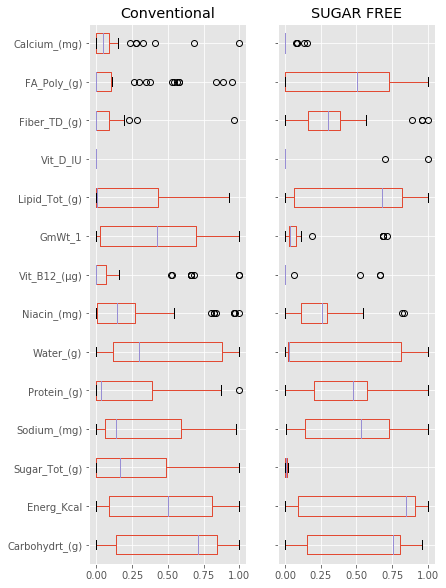

In [271]:
df_both_groups_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_both_groups_copy),
                                             columns=df_both_groups_copy.columns, index=df_both_groups_copy.index)

plt.rcParams['figure.figsize'] = (6, 10)
bxplt_df = df_both_groups_norm[['Carbohydrt_(g)', 'Energ_Kcal', 'Sugar_Tot_(g)', 'Sodium_(mg)', 'Protein_(g)',
 'Water_(g)', 'Niacin_(mg)', 'Vit_B12_(µg)', 'GmWt_1', 'Lipid_Tot_(g)', 'Vit_D_IU', 'Fiber_TD_(g)',
 'FA_Poly_(g)', 'Calcium_(mg)','GROUP']]
bxplt_df["GROUP"] = np.where(bxplt_df["GROUP"]>0, 'SUGAR FREE', 'Conventional')
bxplt_df.groupby(["GROUP"]).boxplot(vert=False, subplots=True)
#plt.title("SUGAR FREE vs. Conventional meal - Ingredient comparison")

In [283]:
## delete unused plots from plotly
requests.post('https://api.plot.ly/v2/files/dzhamzic:31/trash', auth=auth, headers=headers)


<Response [200]>

The whole experiment/notebook (without plotly visualizations) can be found at https://bit.ly/2Lm9Nxx
With Plotly viz : https://bit.ly/2GlDFeI